# Aman Oberoi: Predicting the risk of stroke in patients

## The dataset
The dataset provided contains information about 5110 patients on features such as their age, gender, average glucose level, smoking habits, etc. along with whether they have had stroke or not. This dataset can thus be used to train some machine learning models to predict whether given certain medical information about a person, are they likely to get a stroke or not - and thus help the patients take adequate precautions to prevent a stroke from happening or their general cardiovasucalar health from worsening.

### Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

## Importing libraries and inspecting dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os

In [2]:
health_df = pd.read_csv("stroke_data.csv")

In [3]:
print("Head of df:")
print(health_df.head())
print("DF info:")
print(health_df.info())
print("DF stats:")
print(health_df.describe())

Head of df:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
DF info:
<class 'pandas.core.frame.DataFrame

## Examining data

### Converting non-numeric data to numeric data purely for doing some intial data analysis

In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#mapping males to 1, females to 0 and other genders to 2 
print("Converting gender data to numeric")
gender_list = health_df['gender'].tolist()
label_encoder.fit(gender_list)
print("Classes: ", label_encoder.classes_)

encoded_list = label_encoder.transform(gender_list)
print("Encoded list: ", encoded_list)

health_df = health_df.drop('gender', axis=1) # dropping sick column with t/f values
health_df['gender'] = encoded_list 

#mapping married people to 1, unmarried people to 0
print("Converting marriage data to numeric")
e_list = health_df['ever_married'].tolist()
label_encoder.fit(e_list)
print("Classes: ", label_encoder.classes_)

encoded_list = label_encoder.transform(e_list) 
print("Encoded list: ", encoded_list)

health_df = health_df.drop('ever_married', axis=1) # dropping sick column with t/f values
health_df['ever_married'] = encoded_list

# for smoking_status, mapping 'Unknown' to 0, 'formerly smoked' to 1, 'never smoked' to 2, 'smokes' to 3
print("Converting smoking data to numeric")
s_list = health_df['smoking_status'].tolist()
label_encoder.fit(s_list)
print("Classes: ", label_encoder.classes_)

encoded_list = label_encoder.transform(s_list) 
print("Encoded list: ", encoded_list)

health_df = health_df.drop('smoking_status', axis=1) # dropping sick column with t/f values
health_df['smoking_status'] = encoded_list

#for work_type, mapping 'Govt_job' to 0, 'Never_worked' to 1, 'Private' to 2, 'Self-employed' to 3, 'children' to 4
print("Converting work data to numeric")
w_list = health_df['work_type'].tolist()
label_encoder.fit(w_list)
print("Classes: ", label_encoder.classes_)

encoded_list = label_encoder.transform(w_list) 
print("Encoded list: ", encoded_list)

health_df = health_df.drop('work_type', axis=1) # dropping sick column with t/f values
health_df['work_type'] = encoded_list

#for residence_type, mapping urban to 1 and rural to 0
print("Converting residence data to numeric")
r_list = health_df['Residence_type'].tolist()
label_encoder.fit(r_list)
print("Classes: ", label_encoder.classes_)

encoded_list = label_encoder.transform(r_list) 
print("Encoded list: ", encoded_list)

health_df = health_df.drop('Residence_type', axis=1) # dropping sick column with t/f values
health_df['Residence_type'] = encoded_list

health_df.head() 

Converting gender data to numeric
Classes:  ['Female' 'Male' 'Other']
Encoded list:  [1 0 1 ... 0 1 0]
Converting marriage data to numeric
Classes:  ['No' 'Yes']
Encoded list:  [1 1 1 ... 1 1 1]
Converting smoking data to numeric
Classes:  ['Unknown' 'formerly smoked' 'never smoked' 'smokes']
Encoded list:  [1 2 2 ... 2 1 0]
Converting work data to numeric
Classes:  ['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
Encoded list:  [2 3 2 ... 3 2 0]
Converting residence data to numeric
Classes:  ['Rural' 'Urban']
Encoded list:  [1 0 0 ... 0 0 1]


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,smoking_status,work_type,Residence_type
0,9046,67.0,0,1,228.69,36.6,1,1,1,1,2,1
1,51676,61.0,0,0,202.21,NaN,1,0,1,2,3,0
2,31112,80.0,0,1,105.92,32.5,1,1,1,2,2,0
3,60182,49.0,0,0,171.23,34.4,1,0,1,3,2,1
4,1665,79.0,1,0,174.12,24.0,1,0,1,2,3,0


### Now we have a completely numerical data and can do some initial analysis

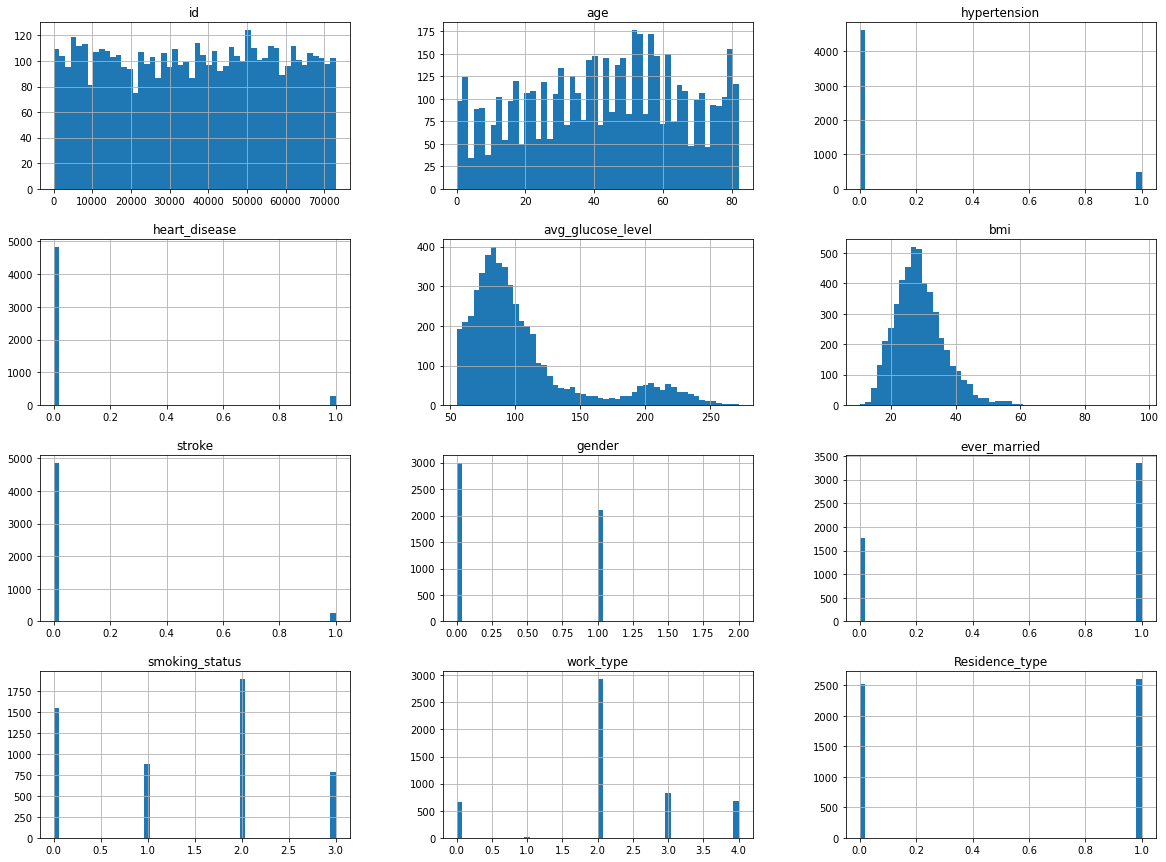

In [5]:
health_df.hist(bins=50, figsize=(20,15))
plt.show()

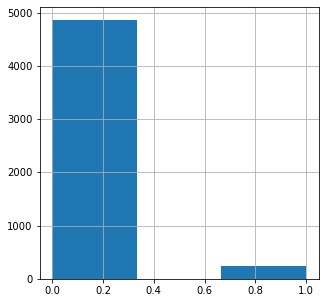

0    4861
1     249
Name: stroke, dtype: int64


In [6]:
health_df['stroke'].hist(bins=3, figsize=(5,5))
plt.show()
print(health_df['stroke'].value_counts())  

Correlation of other variables with the stroke variable:
stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.042374
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
id                   0.006388
work_type           -0.032316
Name: stroke, dtype: float64
Heatmap:


<AxesSubplot:>

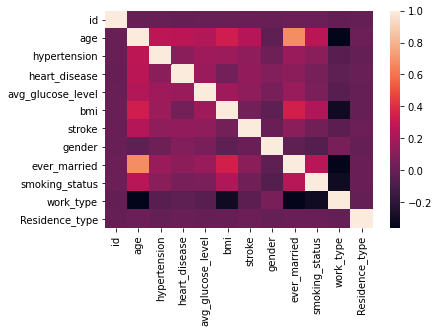

In [7]:
corr_matrix = health_df.corr()
#plotting varibales correlated to the 'sick' variable in descending order
#the correlation matrix contains the correlations between all the variables but only the correlation with ...
# ... the sick variable is important
print("Correlation of other variables with the stroke variable:")
print(corr_matrix['stroke'].sort_values(ascending=False))

import seaborn as sns
print('Heatmap:')
sns.heatmap(corr_matrix)

## Data feature extraction
The id field is not going to be useful for our models as it does not carry any correlation with the stroke variable. We will drop it.

The age, avg_glucose_level, bmi numeric variables can remain the same. I will carry out normalization on all three variables to improve our models performances/

The ever_married and Residence_type categorical variables have no ordinal properties but are binary and dont need One-Hot encoding so I will transform them into a binary numeric type.

The gender, work_type and smoking_status categorical variables have no ordinal properties either but are not binary so I will one-hot encode these predictor variables. Note that smoking_status could be considered as an ordinal variable but it also has an unknown value which will contribute to noise if we choose to treat the variable as ordinal.

In [8]:
health_df = pd.read_csv("stroke_data.csv") # reimporting dataset
health_df = health_df.drop('id', axis=1) # dropping id as it is not a useful variable for our study

### Identifying variables with null values

In [9]:
health_df.columns[health_df.isna().any()].tolist() 

['bmi']

In [10]:
incomp_rows = health_df[health_df.isnull().any(axis=1)].head()
len(incomp_rows)

5

The 'bmi' is the only variable with missing values and only 5 datapoints are missing the BMI information. The best strategy here would be to replace the bmi with the median of the entire column or drop the datapoints but I prefer replacing with median to keep the 5 datapoints for training the model later.

### Converting categorical variables ever_married and Residence_type to numeric

In [11]:
#mapping married people to 1, unmarried people to 0
print("Converting marriage data to numeric")
e_list = health_df['ever_married'].tolist()
label_encoder.fit(e_list)
print("Classes: ", label_encoder.classes_)

encoded_list = label_encoder.transform(e_list) 
print("Encoded list: ", encoded_list)

health_df = health_df.drop('ever_married', axis=1) # dropping sick column with t/f values
health_df['ever_married'] = encoded_list

#for residence_type, mapping urban to 1 and rural to 0
print("Converting residence data to numeric")
r_list = health_df['Residence_type'].tolist()
label_encoder.fit(r_list)
print("Classes: ", label_encoder.classes_)

encoded_list = label_encoder.transform(r_list) 
print("Encoded list: ", encoded_list)

health_df = health_df.drop('Residence_type', axis=1) # dropping sick column with t/f values
health_df['Residence_type'] = encoded_list

health_df.head()

Converting marriage data to numeric
Classes:  ['No' 'Yes']
Encoded list:  [1 1 1 ... 1 1 1]
Converting residence data to numeric
Classes:  ['Rural' 'Urban']
Encoded list:  [1 0 0 ... 0 0 1]


,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married,Residence_type
0,Male,67.0,0,1,Private,228.69,36.6,formerly smoked,1,1,1
1,Female,61.0,0,0,Self-employed,202.21,NaN,never smoked,1,1,0
2,Male,80.0,0,1,Private,105.92,32.5,never smoked,1,1,0
3,Female,49.0,0,0,Private,171.23,34.4,smokes,1,1,1
4,Female,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,1,0


## Pipeline to transform data

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

stroke_labels = health_df["stroke"].copy()
health_df = health_df.drop("stroke", axis=1)

OHE_var = ['gender', 'work_type', 'smoking_status'] # variables I intend to OHE

health_num = health_df.drop(OHE_var, axis=1)

imputer = SimpleImputer(strategy="median") # use median imputation for missing values (for BMI)

print(health_df.head())
bmi_idx, gluc_idx = 5, 6

# 
class AugmentFeatures(BaseEstimator, TransformerMixin):
    '''
    implements the cross feature bmi_gluc = bmi * glucose level
    '''
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        bmi_gluc = X[:, bmi_idx] * X[:, gluc_idx]
        return np.c_[X, bmi_gluc]

attr_adder = AugmentFeatures()
health_extra_attribs = attr_adder.transform(health_df.values) # generate new features

# this will be are numerical pipeline
# 1. impute, 2. augment the feature set 3. normalize using StandardScaler()
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

health_num_tr = num_pipeline.fit_transform(health_num)

numerical_features = list(health_num)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), OHE_var),
    ])

health_prepared = full_pipeline.fit_transform(health_df)
print("\n")
print("Prepared health data shape:")
print(health_prepared.shape)
print("Prepared health data examples:")
print(health_prepared)

   gender   age  hypertension  heart_disease      work_type  \
0    Male  67.0             0              1        Private   
1  Female  61.0             0              0  Self-employed   
2    Male  80.0             0              1        Private   
3  Female  49.0             0              0        Private   
4  Female  79.0             1              0  Self-employed   

   avg_glucose_level   bmi   smoking_status  ever_married  Residence_type  
0             228.69  36.6  formerly smoked             1               1  
1             202.21   NaN     never smoked             1               0  
2             105.92  32.5     never smoked             1               0  
3             171.23  34.4           smokes             1               1  
4             174.12  24.0     never smoked             1               0  


Prepared health data shape:
(5110, 20)
Prepared health data examples:
[[ 1.05143428 -0.32860186  4.18503199 ...  1.          0.
   0.        ]
 [ 0.78607007 -0.328

20 features does not seem like a lot, however, we can still do some Principal Component Analysis to reduce the dimensionality of our data (to reduce noise, etc.)

### Dimensionality Reduction: Principal Component Analysis

In [13]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=8) # reducing the number of features

health_pca = pca.fit_transform(health_prepared)
# we will train and test models on both the reduced dimension data and the normal prepared data
health_pca.shape

(5110, 8)

OLS (Feature Selection)

In [14]:
import statsmodels.api as sm

health_stats = sm.OLS(stroke_labels, health_prepared)
result_stats = health_stats.fit()

Note that in the table below the following are the variables:
1 - age
2 - hypertension
3 - heart rate
4 - average glucose level
5 - BMI
6 - ever married
7 - residence type
8 - BMI x glucose (cross term)
9 - female
10 - male
11 - other
12 - govt job
13 - never worked
14 - private work
15 - self employed
16 - child
17 - unknown smoking status
18 - formerly smoking
19 - never smoked
20 - smokes

In [15]:
print(result_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     27.72
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           3.11e-85
Time:                        16:41:48   Log-Likelihood:                 822.98
No. Observations:                5110   AIC:                            -1610.
Df Residuals:                    5092   BIC:                            -1492.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0699      0.005     14.287      0.0

From the data it looks like the 'other' gender type, private work and the 'never smoked' smoking type are variables with high p values which means that the stroke labels (whether someone has had a stroke or not) doesnt depend much on these variables. This makes intuitive sense for never smoked - as although a person doesnt smoke, they are still susceptible to strokes due to other factors.

In [16]:
health_pca_stats = sm.OLS(stroke_labels, health_pca)

result_pca_stats = health_pca_stats.fit()

In [17]:
print(result_pca_stats.summary())

                                 OLS Regression Results                                
Dep. Variable:                 stroke   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.069
Method:                 Least Squares   F-statistic:                              48.03
Date:                Wed, 18 Aug 2021   Prob (F-statistic):                    3.48e-75
Time:                        16:41:48   Log-Likelihood:                          654.68
No. Observations:                5110   AIC:                                     -1293.
Df Residuals:                    5102   BIC:                                     -1241.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Observe how the values in the P > |t| column have gone down significantly. This is good as we want our p-values to be as low as possible as it implies that the model is confident that our strple labels are dependent on our predictor features

### Splitting dataset into training and testing data

In [18]:
#this code block creates test train split of data that hasnt had its dimensionality reduced through pca - this data
# ... has a lot of noise so I will train my models on the PCA treated data
#from sklearn.model_selection import train_test_split
#train, test, target, target_test = train_test_split(health_prepared, stroke_labels, test_size=0.2, random_state=0)

In [19]:
from sklearn.model_selection import train_test_split
p_train, p_test, p_target, p_target_test = train_test_split(health_pca, stroke_labels, test_size=0.2, random_state=0)
print(p_train.shape)
print(p_test.shape)
print(p_target.shape)
print(p_target_test.shape)

(4088, 8)
(1022, 8)
(4088,)
(1022,)


## Balancing dataset

In [20]:
import sys
!{sys.executable} -m pip install imblearn
!{sys.executable} -m pip install delayed

     |████████████████████████████████| 206 kB 6.5 MB/s eta 0:00:01     |█████████▌                      | 61 kB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 72 kB 1.2 MB/s eta 0:00:011


(5839, 8)
(5839,)


<AxesSubplot:>

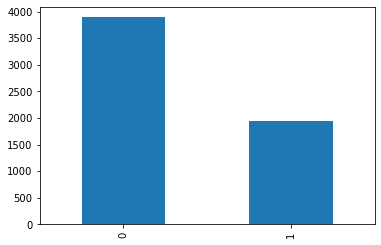

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33, sampling_strategy=0.5)

X_train_new, y_train_new = sm.fit_resample(p_train, p_target.ravel())
print(X_train_new.shape)
print(y_train_new.shape)
pd.Series(y_train_new).value_counts().plot.bar()

## Logistic Regression Classifier with KFold cross validation

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True) 

model_1 = LogisticRegression(penalty='l2', max_iter=200, solver='sag')
model_2 = LogisticRegression(penalty='l1', solver='liblinear')
model_3 = LogisticRegression()

### Training models on non dimensionality reduced data

In [23]:
from sklearn.metrics import accuracy_score

labels_arr = stroke_labels

sum1 = 0
for train_index, test_index in kf.split(health_prepared):
    X_train, X_test = health_prepared[train_index], health_prepared[test_index] 
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
    model_1.fit(X_train_new, y_train_new)
    preds = model_1.predict(X_test)
    sum1 += accuracy_score(y_test, preds) * 100

print("Average accuracy for model 1: ", (sum1/10))

sum2 = 0
for train_index, test_index in kf.split(health_prepared):
    X_train, X_test = health_prepared[train_index], health_prepared[test_index] 
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
    model_2.fit(X_train_new, y_train_new)
    preds = model_2.predict(X_test)
    sum2 += accuracy_score(y_test, preds) * 100

print("Average accuracy for model 2: ", (sum2/10))

sum3 = 0
for train_index, test_index in kf.split(health_prepared):
    X_train, X_test = health_prepared[train_index], health_prepared[test_index] 
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
    model_3.fit(X_train_new, y_train_new)
    preds = model_3.predict(X_test)
    sum3 += accuracy_score(y_test, preds) * 100

print("Average accuracy for model 3: ", (sum3/10))

Average accuracy for model 1:  82.62230919765166
Average accuracy for model 2:  82.91585127201566


/Users/amanoberoi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/amanoberoi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Average accuracy for model 3:  82.73972602739727


/Users/amanoberoi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Looks like both model 1 has the best accuracy

### Training model on dimenstionality reduced data

In [24]:
labels_arr = stroke_labels

sum1 = 0
for train_index, test_index in kf.split(health_pca):
    X_train, X_test = health_pca[train_index], health_pca[test_index] 
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
    model_1.fit(X_train_new, y_train_new)
    preds = model_1.predict(X_test)
    sum1 += accuracy_score(y_test, preds) * 100

print("Average accuracy for model 1: ", (sum1/10))

sum2 = 0
for train_index, test_index in kf.split(health_pca):
    X_train, X_test = health_pca[train_index], health_pca[test_index] 
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
    model_2.fit(X_train_new, y_train_new)
    preds = model_2.predict(X_test)
    sum2 += accuracy_score(y_test, preds) * 100

print("Average accuracy for model 2: ", (sum2/10))

sum3 = 0
for train_index, test_index in kf.split(health_pca):
    X_train, X_test = health_pca[train_index], health_pca[test_index] 
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
    model_3.fit(X_train_new, y_train_new)
    preds = model_3.predict(X_test)
    sum3 += accuracy_score(y_test, preds) * 100

print("Average accuracy for model 3: ", (sum3/10))

Average accuracy for model 1:  83.17025440313111
Average accuracy for model 2:  83.26810176125244
Average accuracy for model 3:  83.18982387475538


Treating on dimensionality reduced data produces slightly better accuracy for logistic regression

In [25]:
log_reg = LogisticRegression(penalty='l2', max_iter=200, solver='sag')
#the model we pick after cross validation

In [26]:
log_reg.fit(X_train_new, y_train_new)
predictions_lr = log_reg.predict(p_test)

Accuracy of logistic regression model (in %): 83.95303326810176
Precision score: 0.17261904761904762
Recall score: 0.5370370370370371
F1 score: 0.26126126126126126
Confusion matrix:


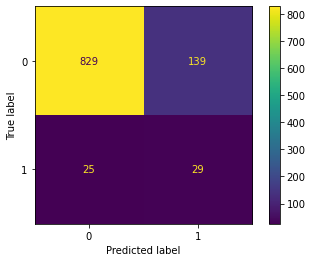

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pylab as pl
from sklearn.metrics import plot_confusion_matrix

acc = (accuracy_score(p_target_test, predictions_lr) * 100)
print("Accuracy of logistic regression model (in %):", acc)

prec = precision_score(p_target_test, predictions_lr)
print("Precision score:", prec)

recall = recall_score(p_target_test, predictions_lr)
print("Recall score:", recall)

f1 = f1_score(p_target_test, predictions_lr)
print("F1 score:", f1)

print("Confusion matrix:")
#cm = confusion_matrix(target_test, predictions_lr, labels=[0, 1])

plot_confusion_matrix(log_reg, p_test, p_target_test)  
plt.show()

### Logistic regression model with a lower threshold for predicting 1 to increase recall

Accuracy of logistic regression model with lower threshold (in %): 80.43052837573386
Precision score: 0.17410714285714285
Recall score: 0.7222222222222222
F1 score: 0.2805755395683453
confusion matrix:


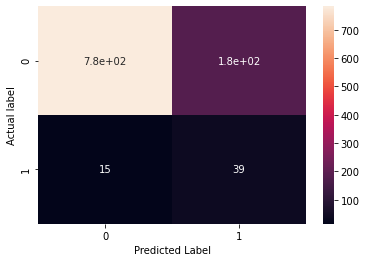

In [28]:
predictions_thres = log_reg.predict_proba(p_test)

threshold = 0.4 
preds = []
for l in predictions_thres: #creating a predictions array based on the threshold
    if(l[:1] > (1 -threshold)):
        preds.append(0)
    else:
        preds.append(1)

preds = np.asarray(preds)


acc = (accuracy_score(p_target_test, preds) * 100)
print("Accuracy of logistic regression model with lower threshold (in %):", acc)

prec = precision_score(p_target_test, preds)
print("Precision score:", prec)

recall = recall_score(p_target_test, preds)
print("Recall score:", recall)

f1 = f1_score(p_target_test, preds)
print("F1 score:", f1)


from matplotlib.colors import LogNorm

cm = confusion_matrix(p_target_test, preds, labels = [0, 1])
print("confusion matrix:")

plot = sns.heatmap(cm, annot=True) # along the y axis are the true values, along the x axis are the predicted values
plot.set(xlabel='Predicted Label', ylabel='Actual label')
plt.show()

## Ensemble Classification Method with KFold Cross Validation

In [29]:
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model_2 = RandomForestClassifier(n_estimators=50, 
                               bootstrap = True,
                               max_features = 'sqrt')
model_3 = RandomForestClassifier(n_estimators=25, 
                               bootstrap = True,
                               max_features = 'sqrt')
model_4 = RandomForestClassifier(n_estimators=200, 
                               bootstrap = True,
                               max_features = 'sqrt')

sum1 = 0
for train_index, test_index in kf.split(health_pca):
    X_train, X_test = health_pca[train_index], health_pca[test_index] 
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
    model_1.fit(X_train_new, y_train_new)
    preds = model_1.predict(X_test)
    sum1 += accuracy_score(y_test, preds) * 100

print("Average accuracy for model 1: ", (sum1/10))

sum2 = 0
for train_index, test_index in kf.split(health_pca):
    X_train, X_test = health_pca[train_index], health_pca[test_index] 
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
    model_2.fit(X_train_new, y_train_new)
    preds = model_2.predict(X_test)
    sum2 += accuracy_score(y_test, preds) * 100

print("Average accuracy for model 2: ", (sum2/10))

sum3 = 0
for train_index, test_index in kf.split(health_pca):
    X_train, X_test = health_pca[train_index], health_pca[test_index] 
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
    model_3.fit(X_train_new, y_train_new)
    preds = model_3.predict(X_test)
    sum3 += accuracy_score(y_test, preds) * 100

print("Average accuracy for model 3: ", (sum3/10))

sum4 = 0
for train_index, test_index in kf.split(health_pca):
    X_train, X_test = health_pca[train_index], health_pca[test_index] 
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
    model_4.fit(X_train_new, y_train_new)
    preds = model_4.predict(X_test)
    sum4 += accuracy_score(y_test, preds) * 100

print("Average accuracy for model 4: ", (sum4/10))

Average accuracy for model 1:  89.72602739726028
Average accuracy for model 2:  89.96086105675147
Average accuracy for model 3:  89.33463796477494
Average accuracy for model 4:  89.74559686888455


In [30]:
rf = model_4
X_train_new, y_train_new = sm.fit_resample(p_train, p_target.ravel())
rf.fit(X_train_new, y_train_new)
predictions_rf = rf.predict(p_test)

Accuracy of random forrest classifier model (in %): 89.92172211350294
Precision score: 0.1111111111111111
Recall score: 0.12962962962962962
F1 score: 0.11965811965811965
Confusion matrix:


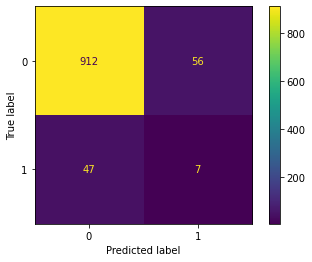

In [31]:
acc = (accuracy_score(p_target_test, predictions_rf) * 100)
print("Accuracy of random forrest classifier model (in %):", acc)

prec = precision_score(p_target_test, predictions_rf)
print("Precision score:", prec)

recall = recall_score(p_target_test, predictions_rf)
print("Recall score:", recall)

f1 = f1_score(p_target_test, predictions_rf)
print("F1 score:", f1)

print("Confusion matrix:")
#cm = confusion_matrix(target_test, predictions_lr, labels=[0, 1])

plot_confusion_matrix(rf, p_test, p_target_test)  
plt.show()

## Neural Net Classifier with KFold Cross Validation

In [32]:
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow

     |████████████████████████████████| 1.3 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 199.0 MB 10.3 MB/s eta 0:00:01    |██▊                             | 16.7 MB 12.3 MB/s eta 0:00:15     |██▊                             | 17.3 MB 12.3 MB/s eta 0:00:15     |████▍                           | 27.4 MB 9.5 MB/s eta 0:00:19     |██████▉                         | 42.7 MB 9.2 MB/s eta 0:00:17     |███████▍                        | 46.3 MB 9.4 MB/s eta 0:00:17  | 69.3 MB 480 kB/s eta 0:04:31     |██████████████████████▌         | 140.0 MB 11.1 MB/s eta 0:00:06     |███████████████████████████▏    | 169.2 MB 10.9 MB/s eta 0:00:03     |██████████████████████████████  | 187.2 MB 11.3 MB/s eta 0:00:02
     |████████████████████████████████| 42 kB 3.1 MB/s  eta 0:00:01
     |████████████████████████████████| 15.6 MB 10.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.9 MB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 14.1 MB/s eta 0:00:01   

### Initial testing

In [33]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_new, y_train_new, epochs=150, batch_size=10)

predictions_nn = model.predict(p_test)

Epoch 1/150
584/584 [==============================] - 1s 1ms/step - loss: 0.5222 - accuracy: 0.6943
Epoch 2/150
584/584 [==============================] - 1s 1ms/step - loss: 0.4418 - accuracy: 0.7732
Epoch 3/150
584/584 [==============================] - 1s 1ms/step - loss: 0.4268 - accuracy: 0.7849
Epoch 4/150
584/584 [==============================] - 1s 996us/step - loss: 0.4170 - accuracy: 0.7875
Epoch 5/150
584/584 [==============================] - 1s 1ms/step - loss: 0.4088 - accuracy: 0.7907
Epoch 6/150
584/584 [==============================] - 1s 997us/step - loss: 0.4026 - accuracy: 0.7962
Epoch 7/150
584/584 [==============================] - 1s 1ms/step - loss: 0.3961 - accuracy: 0.7996
Epoch 8/150
584/584 [==============================] - 1s 1ms/step - loss: 0.3928 - accuracy: 0.8029
Epoch 9/150
584/584 [==============================] - 1s 1ms/step - loss: 0.3894 - accuracy: 0.8054
Epoch 10/150
584/584 [==============================] - 1s 1ms/step - loss: 0.3866 - ac

584/584 [==============================] - 1s 1ms/step - loss: 0.3189 - accuracy: 0.8548
Epoch 81/150
584/584 [==============================] - 1s 1ms/step - loss: 0.3177 - accuracy: 0.8541: 0s - loss: 0.3092 - accu
Epoch 82/150
584/584 [==============================] - 1s 1ms/step - loss: 0.3171 - accuracy: 0.8548
Epoch 83/150
584/584 [==============================] - 1s 1ms/step - loss: 0.3165 - accuracy: 0.8549
Epoch 84/150
584/584 [==============================] - 1s 1ms/step - loss: 0.3155 - accuracy: 0.8546
Epoch 85/150
584/584 [==============================] - 1s 1ms/step - loss: 0.3147 - accuracy: 0.8587
Epoch 86/150
584/584 [==============================] - 1s 1ms/step - loss: 0.3148 - accuracy: 0.8553
Epoch 87/150
584/584 [==============================] - 1s 1ms/step - loss: 0.3137 - accuracy: 0.8546
Epoch 88/150
584/584 [==============================] - 1s 1ms/step - loss: 0.3138 - accuracy: 0.8548
Epoch 89/150
584/584 [==============================] - 1s 1ms/step -

It looks like our models accuracy plateaud after epoch 55 and any further training will lead to a waste of computer resources

In [34]:
threshold = 0.5
predictions_nn = np.where(predictions_nn > threshold, 1, 0)

acc = (accuracy_score(p_target_test, predictions_nn) * 100)
print("Accuracy of neural network model (in %):", acc)

prec = precision_score(p_target_test, predictions_nn)
print("Precision score:", prec)

recall = recall_score(p_target_test, predictions_nn)
print("Recall score:", recall)

f1 = f1_score(p_target_test, predictions_nn)
print("F1 score:", f1)

print("Confusion matrix:")
#cm = confusion_matrix(target_test, predictions_lr, labels=[0, 1])

Accuracy of neural network model (in %): 82.28962818003914
Precision score: 0.11976047904191617
Recall score: 0.37037037037037035
F1 score: 0.18099547511312217
Confusion matrix:


### Cross validation with different models

In [35]:
model_1 = Sequential()
model_1.add(Dense(8, input_dim=8, activation='relu'))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_2 = Sequential()
model_2.add(Dense(8, input_dim=8, activation='relu'))
model_2.add(Dense(10, activation='sigmoid'))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_3 = Sequential()
model_3.add(Dense(12, input_dim=8, activation='relu'))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
threshold = 0.5
sum1 = 0
for train_index, test_index in kf.split(health_pca):
    X_train, X_test = health_pca[train_index], health_pca[test_index] 
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
    model_1.fit(X_train_new, y_train_new, epochs=50, batch_size=50)
    preds = model_1.predict(X_test)
    preds = np.where(preds > threshold, 1, 0)
    sum1 += accuracy_score(y_test, preds) * 100

print("Average accuracy for model 1: ", (sum1/10))

sum2 = 0
for train_index, test_index in kf.split(health_pca):
    X_train, X_test = health_pca[train_index], health_pca[test_index] 
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
    model_2.fit(X_train_new, y_train_new, epochs=50, batch_size=20)
    preds = model_2.predict(X_test)
    preds = np.where(preds > threshold, 1, 0)
    sum2 += accuracy_score(y_test, preds) * 100

print("Average accuracy for model 2: ", (sum2/10))

sum3 = 0
for train_index, test_index in kf.split(health_pca):
    X_train, X_test = health_pca[train_index], health_pca[test_index] 
    y_train, y_test = labels_arr[train_index], labels_arr[test_index]
    X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())
    model_3.fit(X_train_new, y_train_new, epochs=75, batch_size=10)
    preds = model_3.predict(X_test)
    preds = np.where(preds > threshold, 1, 0)
    sum3 += accuracy_score(y_test, preds) * 100

print("Average accuracy for model 3: ", (sum3/10))

Epoch 1/50
132/132 [==============================] - 1s 1ms/step - loss: 0.6462 - accuracy: 0.6191
Epoch 2/50
132/132 [==============================] - 0s 1ms/step - loss: 0.5329 - accuracy: 0.6947
Epoch 3/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.7377
Epoch 4/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7524
Epoch 5/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.7651
Epoch 6/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.7763
Epoch 7/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.7788
Epoch 8/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.7805
Epoch 9/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4404 - accuracy: 0.7826
Epoch 10/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7818

132/132 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8053
Epoch 33/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8048
Epoch 34/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8042
Epoch 35/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8010
Epoch 36/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8036
Epoch 37/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8032
Epoch 38/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8051
Epoch 39/50
132/132 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8036
Epoch 40/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8047
Epoch 41/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8041
Ep

132/132 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8188
Epoch 14/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3727 - accuracy: 0.8209
Epoch 15/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3727 - accuracy: 0.8217
Epoch 16/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8208
Epoch 17/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8197
Epoch 18/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.8206
Epoch 19/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8217
Epoch 20/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3707 - accuracy: 0.8194
Epoch 21/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3705 - accuracy: 0.8190
Epoch 22/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8205
Ep

132/132 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8198
Epoch 45/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3694 - accuracy: 0.8187
Epoch 46/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.8193
Epoch 47/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8193
Epoch 48/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8220
Epoch 49/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8184
Epoch 50/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8190
Epoch 1/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.8186
Epoch 2/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8183
Epoch 3/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8156
Epoch

132/132 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8259
Epoch 26/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8271
Epoch 27/50
132/132 [==============================] - 0s 992us/step - loss: 0.3572 - accuracy: 0.8251
Epoch 28/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8247
Epoch 29/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3567 - accuracy: 0.8271
Epoch 30/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8264
Epoch 31/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8248
Epoch 32/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8262
Epoch 33/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8253
Epoch 34/50
132/132 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8267


Epoch 6/50
132/132 [==============================] - 0s 930us/step - loss: 0.3527 - accuracy: 0.8300
Epoch 7/50
132/132 [==============================] - 0s 977us/step - loss: 0.3533 - accuracy: 0.8253
Epoch 8/50
132/132 [==============================] - 0s 925us/step - loss: 0.3523 - accuracy: 0.8271
Epoch 9/50
132/132 [==============================] - 0s 979us/step - loss: 0.3512 - accuracy: 0.8308
Epoch 10/50
132/132 [==============================] - 0s 916us/step - loss: 0.3508 - accuracy: 0.8279
Epoch 11/50
132/132 [==============================] - 0s 992us/step - loss: 0.3509 - accuracy: 0.8302
Epoch 12/50
132/132 [==============================] - 0s 934us/step - loss: 0.3508 - accuracy: 0.8283
Epoch 13/50
132/132 [==============================] - 0s 972us/step - loss: 0.3508 - accuracy: 0.8280
Epoch 14/50
132/132 [==============================] - 0s 935us/step - loss: 0.3503 - accuracy: 0.8302
Epoch 15/50
132/132 [==============================] - 0s 906us/step - loss: 

132/132 [==============================] - 0s 968us/step - loss: 0.3383 - accuracy: 0.8400
Epoch 36/50
132/132 [==============================] - 0s 980us/step - loss: 0.3379 - accuracy: 0.8387
Epoch 37/50
132/132 [==============================] - 0s 941us/step - loss: 0.3380 - accuracy: 0.8379
Epoch 38/50
132/132 [==============================] - 0s 958us/step - loss: 0.3375 - accuracy: 0.8408
Epoch 39/50
132/132 [==============================] - 0s 924us/step - loss: 0.3386 - accuracy: 0.8408
Epoch 40/50
132/132 [==============================] - 0s 926us/step - loss: 0.3377 - accuracy: 0.8361
Epoch 41/50
132/132 [==============================] - 0s 937us/step - loss: 0.3370 - accuracy: 0.8397
Epoch 42/50
132/132 [==============================] - 0s 921us/step - loss: 0.3371 - accuracy: 0.8368
Epoch 43/50
132/132 [==============================] - 0s 914us/step - loss: 0.3370 - accuracy: 0.8370
Epoch 44/50
132/132 [==============================] - 0s 921us/step - loss: 0.3368 -

329/329 [==============================] - 0s 925us/step - loss: 0.3946 - accuracy: 0.8113
Epoch 14/50
329/329 [==============================] - 0s 893us/step - loss: 0.3940 - accuracy: 0.8123
Epoch 15/50
329/329 [==============================] - 0s 898us/step - loss: 0.3935 - accuracy: 0.8110
Epoch 16/50
329/329 [==============================] - 0s 887us/step - loss: 0.3930 - accuracy: 0.8139
Epoch 17/50
329/329 [==============================] - 0s 926us/step - loss: 0.3923 - accuracy: 0.8163
Epoch 18/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3920 - accuracy: 0.8140
Epoch 19/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8143: 0s - loss: 0.3957 - accuracy: 0.
Epoch 20/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8152
Epoch 21/50
329/329 [==============================] - 0s 937us/step - loss: 0.3903 - accuracy: 0.8164
Epoch 22/50
329/329 [==============================] - 0s

329/329 [==============================] - 0s 933us/step - loss: 0.3673 - accuracy: 0.8246
Epoch 43/50
329/329 [==============================] - 0s 892us/step - loss: 0.3665 - accuracy: 0.8252
Epoch 44/50
329/329 [==============================] - 0s 875us/step - loss: 0.3665 - accuracy: 0.8255
Epoch 45/50
329/329 [==============================] - 0s 889us/step - loss: 0.3661 - accuracy: 0.8237
Epoch 46/50
329/329 [==============================] - 0s 895us/step - loss: 0.3655 - accuracy: 0.8263
Epoch 47/50
329/329 [==============================] - 0s 935us/step - loss: 0.3658 - accuracy: 0.8250
Epoch 48/50
329/329 [==============================] - 0s 969us/step - loss: 0.3659 - accuracy: 0.8261
Epoch 49/50
329/329 [==============================] - 0s 884us/step - loss: 0.3653 - accuracy: 0.8253
Epoch 50/50
329/329 [==============================] - 0s 901us/step - loss: 0.3653 - accuracy: 0.8250
Epoch 1/50
328/328 [==============================] - 0s 898us/step - loss: 0.3938 - 

329/329 [==============================] - 0s 951us/step - loss: 0.3634 - accuracy: 0.8223
Epoch 22/50
329/329 [==============================] - 0s 954us/step - loss: 0.3633 - accuracy: 0.8220
Epoch 23/50
329/329 [==============================] - 0s 948us/step - loss: 0.3631 - accuracy: 0.8254
Epoch 24/50
329/329 [==============================] - 0s 978us/step - loss: 0.3627 - accuracy: 0.8206
Epoch 25/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8235
Epoch 26/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3622 - accuracy: 0.8235
Epoch 27/50
329/329 [==============================] - 0s 969us/step - loss: 0.3621 - accuracy: 0.8249
Epoch 28/50
329/329 [==============================] - 0s 917us/step - loss: 0.3617 - accuracy: 0.8241
Epoch 29/50
329/329 [==============================] - 0s 980us/step - loss: 0.3613 - accuracy: 0.8255
Epoch 30/50
329/329 [==============================] - 0s 936us/step - loss: 0.3611 - acc

329/329 [==============================] - 0s 899us/step - loss: 0.3603 - accuracy: 0.8244
Epoch 2/50
329/329 [==============================] - 0s 907us/step - loss: 0.3572 - accuracy: 0.8267
Epoch 3/50
329/329 [==============================] - 0s 911us/step - loss: 0.3556 - accuracy: 0.8292
Epoch 4/50
329/329 [==============================] - 0s 912us/step - loss: 0.3545 - accuracy: 0.8305
Epoch 5/50
329/329 [==============================] - 0s 905us/step - loss: 0.3543 - accuracy: 0.8301
Epoch 6/50
329/329 [==============================] - 0s 937us/step - loss: 0.3533 - accuracy: 0.8295
Epoch 7/50
329/329 [==============================] - 0s 898us/step - loss: 0.3530 - accuracy: 0.8308
Epoch 8/50
329/329 [==============================] - 0s 993us/step - loss: 0.3527 - accuracy: 0.8281
Epoch 9/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8293
Epoch 10/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0

Epoch 31/50
328/328 [==============================] - 0s 919us/step - loss: 0.3601 - accuracy: 0.8207
Epoch 32/50
328/328 [==============================] - 0s 969us/step - loss: 0.3595 - accuracy: 0.8188
Epoch 33/50
328/328 [==============================] - 0s 877us/step - loss: 0.3598 - accuracy: 0.8199
Epoch 34/50
328/328 [==============================] - 0s 877us/step - loss: 0.3589 - accuracy: 0.8214
Epoch 35/50
328/328 [==============================] - 0s 974us/step - loss: 0.3590 - accuracy: 0.8210
Epoch 36/50
328/328 [==============================] - 0s 914us/step - loss: 0.3588 - accuracy: 0.8211
Epoch 37/50
328/328 [==============================] - 0s 967us/step - loss: 0.3590 - accuracy: 0.8195
Epoch 38/50
328/328 [==============================] - 0s 917us/step - loss: 0.3589 - accuracy: 0.8211
Epoch 39/50
328/328 [==============================] - 0s 901us/step - loss: 0.3589 - accuracy: 0.8202
Epoch 40/50
328/328 [==============================] - 0s 907us/step - lo

329/329 [==============================] - 0s 903us/step - loss: 0.3529 - accuracy: 0.8300
Epoch 11/50
329/329 [==============================] - 0s 939us/step - loss: 0.3527 - accuracy: 0.8307
Epoch 12/50
329/329 [==============================] - 0s 972us/step - loss: 0.3527 - accuracy: 0.8307
Epoch 13/50
329/329 [==============================] - 0s 893us/step - loss: 0.3523 - accuracy: 0.8320
Epoch 14/50
329/329 [==============================] - 0s 884us/step - loss: 0.3524 - accuracy: 0.8329
Epoch 15/50
329/329 [==============================] - 0s 901us/step - loss: 0.3518 - accuracy: 0.8338
Epoch 16/50
329/329 [==============================] - 0s 906us/step - loss: 0.3518 - accuracy: 0.8318
Epoch 17/50
329/329 [==============================] - 0s 884us/step - loss: 0.3513 - accuracy: 0.8344
Epoch 18/50
329/329 [==============================] - 0s 1ms/step - loss: 0.3516 - accuracy: 0.8341
Epoch 19/50
329/329 [==============================] - 0s 998us/step - loss: 0.3509 - a

Epoch 39/75
657/657 [==============================] - 1s 969us/step - loss: 0.3452 - accuracy: 0.8327
Epoch 40/75
657/657 [==============================] - 1s 1ms/step - loss: 0.3439 - accuracy: 0.8357
Epoch 41/75
657/657 [==============================] - 1s 973us/step - loss: 0.3431 - accuracy: 0.8350
Epoch 42/75
657/657 [==============================] - 1s 1ms/step - loss: 0.3413 - accuracy: 0.8343
Epoch 43/75
657/657 [==============================] - 1s 931us/step - loss: 0.3408 - accuracy: 0.8343
Epoch 44/75
657/657 [==============================] - 1s 976us/step - loss: 0.3398 - accuracy: 0.8369
Epoch 45/75
657/657 [==============================] - 1s 910us/step - loss: 0.3390 - accuracy: 0.8363
Epoch 46/75
657/657 [==============================] - 1s 992us/step - loss: 0.3387 - accuracy: 0.8340
Epoch 47/75
657/657 [==============================] - 1s 944us/step - loss: 0.3371 - accuracy: 0.8333
Epoch 48/75
657/657 [==============================] - 1s 915us/step - loss: 

657/657 [==============================] - 1s 936us/step - loss: 0.3081 - accuracy: 0.8621
Epoch 43/75
657/657 [==============================] - 1s 939us/step - loss: 0.3084 - accuracy: 0.8650
Epoch 44/75
657/657 [==============================] - 1s 911us/step - loss: 0.3071 - accuracy: 0.8645
Epoch 45/75
657/657 [==============================] - 1s 1ms/step - loss: 0.3056 - accuracy: 0.8598
Epoch 46/75
657/657 [==============================] - 1s 899us/step - loss: 0.3064 - accuracy: 0.8634
Epoch 47/75
657/657 [==============================] - 1s 902us/step - loss: 0.3052 - accuracy: 0.8633
Epoch 48/75
657/657 [==============================] - 1s 1ms/step - loss: 0.3051 - accuracy: 0.8625
Epoch 49/75
657/657 [==============================] - 1s 935us/step - loss: 0.3046 - accuracy: 0.86690s - loss: 0.3062 - accuracy: 0.86
Epoch 50/75
657/657 [==============================] - 1s 1ms/step - loss: 0.3035 - accuracy: 0.8631
Epoch 51/75
657/657 [==============================] - 1s

657/657 [==============================] - 1s 1ms/step - loss: 0.2902 - accuracy: 0.8701: 0s - loss: 0.2902 - accuracy: 0.
Epoch 45/75
657/657 [==============================] - 1s 1ms/step - loss: 0.2922 - accuracy: 0.8707
Epoch 46/75
657/657 [==============================] - 1s 1ms/step - loss: 0.2898 - accuracy: 0.8696
Epoch 47/75
657/657 [==============================] - 1s 951us/step - loss: 0.2910 - accuracy: 0.8698
Epoch 48/75
657/657 [==============================] - 1s 1ms/step - loss: 0.2907 - accuracy: 0.8725
Epoch 49/75
657/657 [==============================] - 1s 2ms/step - loss: 0.2911 - accuracy: 0.8663
Epoch 50/75
657/657 [==============================] - 1s 1ms/step - loss: 0.2889 - accuracy: 0.8710: 0s - loss: 0.2798 - 
Epoch 51/75
657/657 [==============================] - 1s 969us/step - loss: 0.2905 - accuracy: 0.8705
Epoch 52/75
657/657 [==============================] - 1s 1ms/step - loss: 0.2891 - accuracy: 0.8698
Epoch 53/75
657/657 [======================

657/657 [==============================] - 1s 977us/step - loss: 0.2837 - accuracy: 0.8697
Epoch 48/75
657/657 [==============================] - 1s 932us/step - loss: 0.2870 - accuracy: 0.8686
Epoch 49/75
657/657 [==============================] - 1s 914us/step - loss: 0.2852 - accuracy: 0.8696
Epoch 50/75
657/657 [==============================] - 1s 947us/step - loss: 0.2829 - accuracy: 0.8706
Epoch 51/75
657/657 [==============================] - 1s 968us/step - loss: 0.2849 - accuracy: 0.8685
Epoch 52/75
657/657 [==============================] - 1s 980us/step - loss: 0.2821 - accuracy: 0.8734
Epoch 53/75
657/657 [==============================] - 1s 934us/step - loss: 0.2824 - accuracy: 0.8699
Epoch 54/75
657/657 [==============================] - 1s 914us/step - loss: 0.2814 - accuracy: 0.8731
Epoch 55/75
657/657 [==============================] - 1s 904us/step - loss: 0.2834 - accuracy: 0.8732
Epoch 56/75
657/657 [==============================] - 1s 906us/step - loss: 0.2832 -

656/656 [==============================] - 1s 1ms/step - loss: 0.2813 - accuracy: 0.8730
Epoch 51/75
656/656 [==============================] - 1s 1ms/step - loss: 0.2808 - accuracy: 0.8736
Epoch 52/75
656/656 [==============================] - 1s 957us/step - loss: 0.2804 - accuracy: 0.8729
Epoch 53/75
656/656 [==============================] - 1s 1ms/step - loss: 0.2815 - accuracy: 0.8707
Epoch 54/75
656/656 [==============================] - 1s 1ms/step - loss: 0.2833 - accuracy: 0.8666
Epoch 55/75
656/656 [==============================] - 1s 968us/step - loss: 0.2815 - accuracy: 0.8709
Epoch 56/75
656/656 [==============================] - 1s 909us/step - loss: 0.2821 - accuracy: 0.8745
Epoch 57/75
656/656 [==============================] - 1s 981us/step - loss: 0.2809 - accuracy: 0.8730
Epoch 58/75
656/656 [==============================] - 1s 952us/step - loss: 0.2806 - accuracy: 0.87060s - loss: 0.2772 - accuracy
Epoch 59/75
656/656 [==============================] - 1s 1ms/ste

656/656 [==============================] - 1s 1ms/step - loss: 0.2678 - accuracy: 0.8835: 0s - loss: 0.2664 - accuracy
Epoch 54/75
656/656 [==============================] - 1s 954us/step - loss: 0.2685 - accuracy: 0.8808
Epoch 55/75
656/656 [==============================] - 1s 950us/step - loss: 0.2686 - accuracy: 0.8811
Epoch 56/75
656/656 [==============================] - 1s 1ms/step - loss: 0.2690 - accuracy: 0.8813
Epoch 57/75
656/656 [==============================] - 1s 985us/step - loss: 0.2697 - accuracy: 0.8779
Epoch 58/75
656/656 [==============================] - 1s 946us/step - loss: 0.2689 - accuracy: 0.8808
Epoch 59/75
656/656 [==============================] - 1s 932us/step - loss: 0.2684 - accuracy: 0.8828
Epoch 60/75
656/656 [==============================] - 1s 991us/step - loss: 0.2699 - accuracy: 0.8765
Epoch 61/75
656/656 [==============================] - 1s 1ms/step - loss: 0.2688 - accuracy: 0.8835
Epoch 62/75
656/656 [==============================] - 1s 952

658/658 [==============================] - 1s 962us/step - loss: 0.2673 - accuracy: 0.8795
Epoch 58/75
658/658 [==============================] - 1s 1ms/step - loss: 0.2681 - accuracy: 0.8772
Epoch 59/75
658/658 [==============================] - 1s 1ms/step - loss: 0.2666 - accuracy: 0.8779
Epoch 60/75
658/658 [==============================] - 1s 1ms/step - loss: 0.2692 - accuracy: 0.8766
Epoch 61/75
658/658 [==============================] - 1s 944us/step - loss: 0.2659 - accuracy: 0.8805
Epoch 62/75
658/658 [==============================] - 1s 1ms/step - loss: 0.2682 - accuracy: 0.8760
Epoch 63/75
658/658 [==============================] - 1s 957us/step - loss: 0.2675 - accuracy: 0.8792
Epoch 64/75
658/658 [==============================] - 1s 955us/step - loss: 0.2676 - accuracy: 0.8760
Epoch 65/75
658/658 [==============================] - 1s 1ms/step - loss: 0.2662 - accuracy: 0.8789: 0s - loss: 0.2664 - accuracy: 
Epoch 66/75
658/658 [==============================] - 1s 982us

657/657 [==============================] - 1s 1ms/step - loss: 0.2518 - accuracy: 0.8860
Epoch 61/75
657/657 [==============================] - 1s 953us/step - loss: 0.2524 - accuracy: 0.8861
Epoch 62/75
657/657 [==============================] - 1s 925us/step - loss: 0.2529 - accuracy: 0.8822
Epoch 63/75
657/657 [==============================] - 1s 970us/step - loss: 0.2536 - accuracy: 0.8834
Epoch 64/75
657/657 [==============================] - 1s 940us/step - loss: 0.2518 - accuracy: 0.8831
Epoch 65/75
657/657 [==============================] - 1s 973us/step - loss: 0.2527 - accuracy: 0.8828
Epoch 66/75
657/657 [==============================] - 1s 979us/step - loss: 0.2505 - accuracy: 0.8868
Epoch 67/75
657/657 [==============================] - 1s 976us/step - loss: 0.2517 - accuracy: 0.8843
Epoch 68/75
657/657 [==============================] - 1s 975us/step - loss: 0.2524 - accuracy: 0.8860
Epoch 69/75
657/657 [==============================] - 1s 967us/step - loss: 0.2506 - a

657/657 [==============================] - 1s 1ms/step - loss: 0.2576 - accuracy: 0.8863
Epoch 65/75
657/657 [==============================] - ETA: 0s - loss: 0.2614 - accuracy: 0.88 - 1s 1ms/step - loss: 0.2594 - accuracy: 0.8830
Epoch 66/75
657/657 [==============================] - 1s 2ms/step - loss: 0.2575 - accuracy: 0.8816
Epoch 67/75
657/657 [==============================] - 1s 1ms/step - loss: 0.2566 - accuracy: 0.8831
Epoch 68/75
657/657 [==============================] - 1s 1ms/step - loss: 0.2551 - accuracy: 0.8869: 0s - loss: 0.2425 - ac
Epoch 69/75
657/657 [==============================] - 1s 1ms/step - loss: 0.2562 - accuracy: 0.8858
Epoch 70/75
657/657 [==============================] - 1s 1ms/step - loss: 0.2555 - accuracy: 0.8849
Epoch 71/75
657/657 [==============================] - 1s 2ms/step - loss: 0.2557 - accuracy: 0.8845
Epoch 72/75
657/657 [==============================] - 1s 1ms/step - loss: 0.2569 - accuracy: 0.8848
Epoch 73/75
657/657 [================

656/656 [==============================] - 1s 1ms/step - loss: 0.2442 - accuracy: 0.8896
Epoch 68/75
656/656 [==============================] - 1s 996us/step - loss: 0.2428 - accuracy: 0.8916
Epoch 69/75
656/656 [==============================] - 1s 993us/step - loss: 0.2446 - accuracy: 0.8913
Epoch 70/75
656/656 [==============================] - 1s 1ms/step - loss: 0.2406 - accuracy: 0.8955
Epoch 71/75
656/656 [==============================] - 1s 1ms/step - loss: 0.2444 - accuracy: 0.8917
Epoch 72/75
656/656 [==============================] - 1s 1ms/step - loss: 0.2432 - accuracy: 0.8933
Epoch 73/75
656/656 [==============================] - 1s 1ms/step - loss: 0.2417 - accuracy: 0.8933
Epoch 74/75
656/656 [==============================] - 1s 1ms/step - loss: 0.2434 - accuracy: 0.8934: 0s - loss: 0.2260 
Epoch 75/75
656/656 [==============================] - 1s 984us/step - loss: 0.2410 - accuracy: 0.8946
Average accuracy for model 3:  86.08610567514678


The output is not visible but I wrote it here for clarity:
Average accuracy for model 1:  83.9334637964775
Average accuracy for model 2:  83.15068493150685
Average accuracy for model 3:  86.36007827788649
NN model 3 seems to be the best

In [37]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=8, activation='relu'))
nn_model.add(Dense(20, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_new, y_train_new = sm.fit_resample(p_train, p_target.ravel())
nn_model.fit(X_train_new, y_train_new, epochs=75, batch_size=10)


Epoch 1/75
584/584 [==============================] - 1s 1ms/step - loss: 0.5251 - accuracy: 0.7135
Epoch 2/75
584/584 [==============================] - 1s 1ms/step - loss: 0.4378 - accuracy: 0.7774
Epoch 3/75
584/584 [==============================] - 1s 992us/step - loss: 0.4259 - accuracy: 0.7914
Epoch 4/75
584/584 [==============================] - 1s 1ms/step - loss: 0.4205 - accuracy: 0.7916
Epoch 5/75
584/584 [==============================] - 1s 1ms/step - loss: 0.4146 - accuracy: 0.7969
Epoch 6/75
584/584 [==============================] - 1s 1ms/step - loss: 0.4115 - accuracy: 0.7943
Epoch 7/75
584/584 [==============================] - 1s 1ms/step - loss: 0.4082 - accuracy: 0.7976
Epoch 8/75
584/584 [==============================] - 1s 1ms/step - loss: 0.4049 - accuracy: 0.7960
Epoch 9/75
584/584 [==============================] - 1s 1ms/step - loss: 0.4010 - accuracy: 0.7991
Epoch 10/75
584/584 [==============================] - 1s 1ms/step - loss: 0.3985 - accuracy: 0.79

Accuracy of neural network model (in %): 84.54011741682974
Precision score: 0.13380281690140844
Recall score: 0.35185185185185186
F1 score: 0.19387755102040816
confusion matrix:


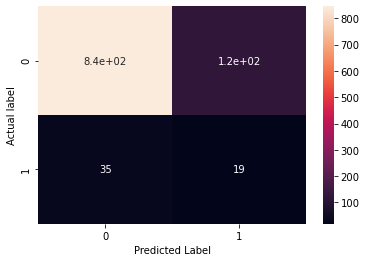

In [38]:
preds = nn_model.predict(p_test)
preds = np.where(preds > threshold, 1, 0)

acc = (accuracy_score(p_target_test, preds) * 100)
print("Accuracy of neural network model (in %):", acc)

prec = precision_score(p_target_test, preds)
print("Precision score:", prec)

recall = recall_score(p_target_test, preds)
print("Recall score:", recall)

f1 = f1_score(p_target_test, preds)
print("F1 score:", f1)

cm = confusion_matrix(p_target_test, preds, labels = [0, 1])
print("confusion matrix:")

plot = sns.heatmap(cm, annot=True) # along the y axis are the true values, along the x axis are the predicted values
plot.set(xlabel='Predicted Label', ylabel='Actual label')
plt.show()

## Best model
As described in my report, I think that the best model for this problem is the logistic regression model (with l2 regularization, sag solver and 200 max iterations) with the lowered classification threshold (bayes classifier) of 0.4. This is not because the model had the best accuracy (just 80% to the highest accuracy of 90% that belongs to the random classifier) but because it had a good mixture of accuracy and recall. The model has a recall of 0.66 which means that it is able to correctly recognize 66% of all people susceptible to strokes/ who have had strokes. The random forrest classifier on the other hand had a recall of just 0.129.

In a real world medical problem such as this, it is more important to correctly classify postive cases (of a disease or risk of disease/stroke like in this case) which is why I would recommend using a model with lower accuracy but higher recall.